# Check `quick` maps (histogram maps without smoothing)

In [1]:
#import functions from module
import sys
sys.path.append('/Users/fardila/Documents/GitHub/HSC_vs_hydro/')
from functions import *

import numpy as np
import os
import pickle

%matplotlib inline 
%load_ext autoreload 
%autoreload 2

Created TAP+ (v1.0) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: False
	Port: 80
	SSL Port: 443


      +------------------------------------------------------------+
      |             Space Telescope Tables Package                 |    
      |                  TABLES Version 3.17                       |
      |                                                            |
      |   Space Telescope Science Institute, Baltimore, Maryland   |
      |   Copyright (C) 2014 Association of Universities for       |
      |            Research in Astronomy, Inc.(AURA)               |
      |       See stsdas$copyright.stsdas for terms of use.        |
      |         For help, send e-mail to help@stsci.edu            |
      +------------------------------------------------------------+
tables/:
 fitsio/        tbplot/         tobsolete/      ttools/


      +------------------------------------------------------------+
      |       Space Telescope Science Data Analysis System         

In [2]:
Illustris_file_quick = '/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/galaxies_stellarmaps_orig_11.2.hdf5'

In [3]:
f = h5py.File(Illustris_file_quick, 'r')
n_galaxies = len(f['catsh_id'])
cat_sh_mstar = np.array(f['catsh_SubhaloMassType'][:, 4])

map_size = f['config'].attrs['map_range_min']
n_pixels = f['config'].attrs['map_npixel']
pixel_scale=2 * (map_size/n_pixels)
f.close()

print "number of galaxies: ", n_galaxies
print "map size in pixels: ", n_pixels
print "map size in kpc: ", map_size
print "pixel scale: ", pixel_scale

number of galaxies:  339
map size in pixels:  300
map size in kpc:  800.0
pixel scale:  5.33333333333


In [9]:
def get_mass_map(sim_file, gal_n=0):

    # Load general simulation and galaxy properties
    f = h5py.File(sim_file, 'r')
    #cat_sh_mstar = np.array(f['cat_sh_mstar'])

    map_stars_insitu = np.array(f['map_star_rho_insitu_xy'])
    map_stars_exsitu = np.array(f['map_star_rho_exsitu_xy'])
    map_stars = map_stars_exsitu + map_stars_insitu

    map_size = f['config'].attrs['map_range_min']
    n_pixels = f['config'].attrs['map_npixel']
    pixel_scale=2 * (map_size/n_pixels)
    
    f.close()

    #make maps
    img_cen = map_stars[gal_n] * (pixel_scale ** 2) # Central
#     img_sat = map_stars[gal_n, 1, 1] * (pixel_scale ** 2) # Satellites
#     img_icl = map_stars[gal_n, 2, 1] * (pixel_scale ** 2) # Diffuse
#     img_cen_sat = (img_cen + img_sat)           # Central + Satellites
#     img_cen_icl = (img_cen + img_icl)           # Central + Satellites
#     img_all = (img_cen + img_sat + img_icl)           # Central + Satellites + Diffuse

    #convert the image into unit of stellar mass instead of mass density
    m_cat = np.log10(cat_sh_mstar[gal_n])
    m_post = np.log10(np.sum(img_cen))
    
    return img_cen

In [19]:
illustris_cat_masses=np.log10(cat_sh_mstar)
illustris_post_masses=[]

for i in range(n_galaxies):
  
    mass_map=get_mass_map(Illustris_file_quick, gal_n=i)
    m_post = np.log10(np.sum(mass_map))    
    
    illustris_post_masses.append(m_post)

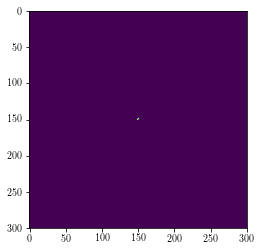

12.4148511258 12.4134130896


In [20]:
plt.imshow(mass_map)
plt.show()
print illustris_cat_masses[0], illustris_post_masses[0]

## PLOTS 

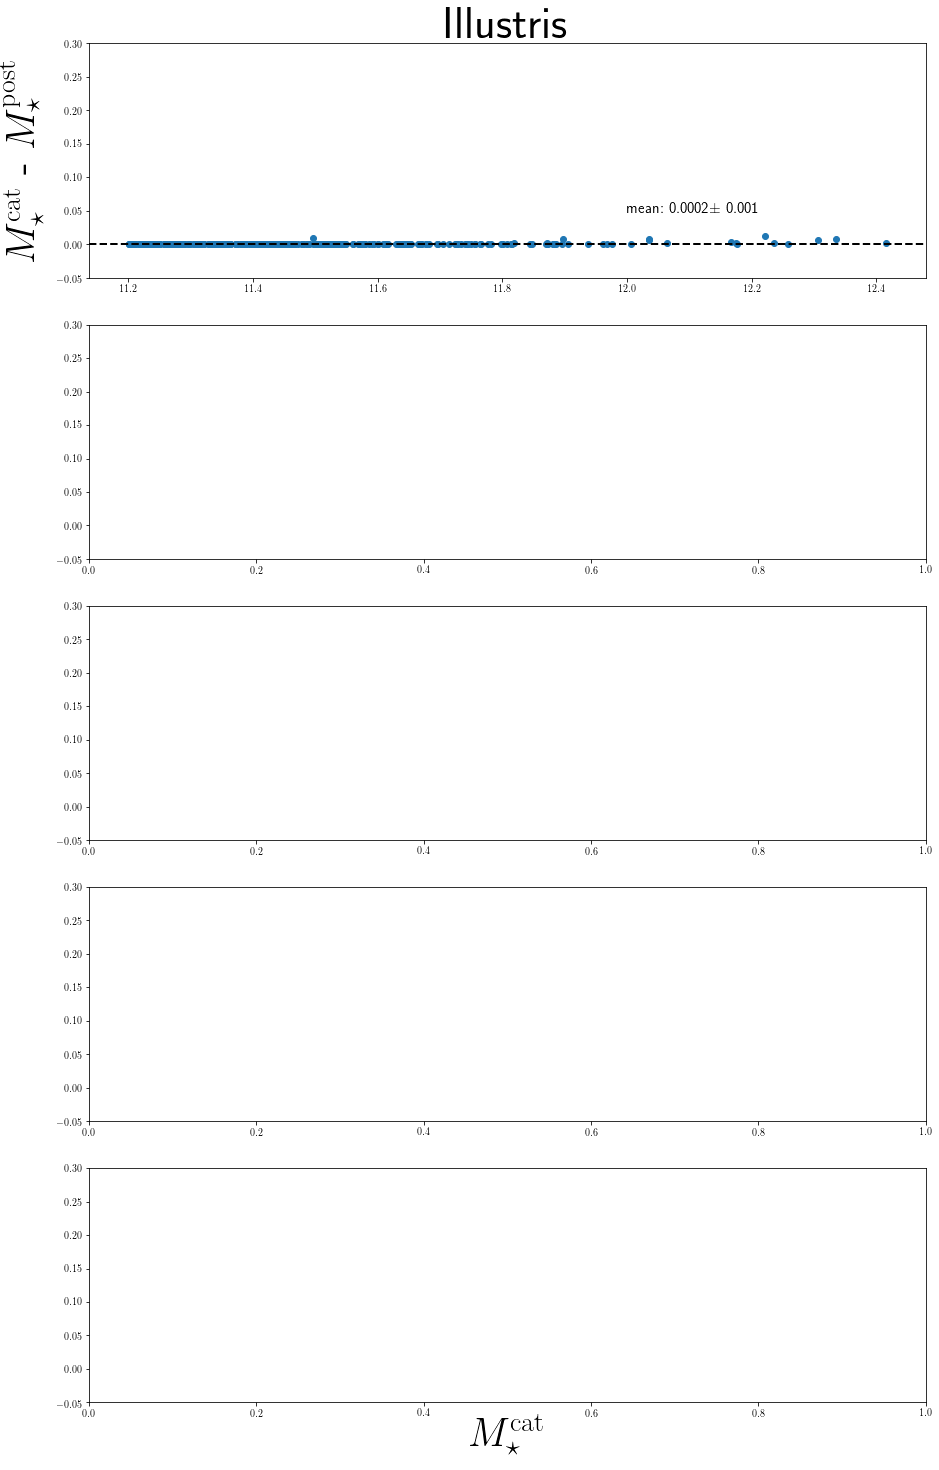

In [24]:
illustris_diff_cat_post = illustris_cat_masses - illustris_post_masses
# illustris_diff_cat_post_icl = illustris_m_cat-illustris_m_post_icl
# illustris_diff_cat_1d100 = illustris_m_cat-illustris_m_1d_100
# illustris_diff_2d_1d_30 = illustris_m_2d_30-illustris_m_1d_30
# illustris_diff_cat_1dextrap = illustris_m_cat-illustris_m_extrap


# #fit lines
# xs=np.linspace(11.2,12.5,100)

# illustris_diff_cat_post_params = np.polyfit(illustris_m_cat[illustris_diff_cat_post<100], 
#                                             illustris_diff_cat_post[illustris_diff_cat_post<100],1)
# illustris_diff_cat_post_line = np.poly1d(illustris_diff_cat_post_params)
# ########################################################################
# illustris_diff_cat_post_icl_params = np.polyfit(illustris_m_cat[illustris_diff_cat_post_icl<100], 
#                                                 illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100], 1)
# illustris_diff_cat_post_icl_line = np.poly1d(illustris_diff_cat_post_icl_params)
# ########################################################################
# illustris_diff_cat_1d100_params = np.polyfit(illustris_m_cat[illustris_diff_cat_1d100<100], 
#                                                 illustris_diff_cat_1d100[illustris_diff_cat_1d100<100], 1)
# illustris_diff_cat_1d100_line = np.poly1d(illustris_diff_cat_1d100_params)
# ########################################################################
# illustris_diff_2d_1d_30_params = np.polyfit(illustris_m_cat[illustris_diff_2d_1d_30<100], 
#                                                 illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100], 1)
# illustris_diff_2d_1d_30_line = np.poly1d(illustris_diff_2d_1d_30_params)
# ########################################################################
# illustris_diff_cat_1dextrap_params = np.polyfit(illustris_m_cat[illustris_diff_cat_1dextrap<100], 
#                                                 illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100], 1)
# illustris_diff_cat_1dextrap_line = np.poly1d(illustris_diff_cat_1dextrap_params)

plt.figure(figsize=[15,25])
ax1=plt.subplot(511)
ax2=plt.subplot(512)
ax3=plt.subplot(513)
ax4=plt.subplot(514)
ax5=plt.subplot(515)


ax1.scatter(illustris_cat_masses, illustris_diff_cat_post)
# ax1.plot(xs, illustris_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
ax1.text(12, 0.05,
         'mean: ' + str(round(np.nanmean(illustris_diff_cat_post),4)) + r'$\pm$ ' + str(round(np.nanstd(illustris_diff_cat_post),3)),
         fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post}}$', fontsize=40)

# ax2.scatter(illustris_m_cat[illustris_diff_cat_post_icl<100], illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100])
# ax2.plot(xs, illustris_diff_cat_post_icl_line(xs))
# ax2.axhline(0,c="k",linewidth=2,linestyle='--')
# ax2.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_post_icl_params), fontsize=15)
# ax2.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post, diffuse}}$ ', fontsize=40)

# ax3.scatter(illustris_m_cat[illustris_diff_cat_1d100<100], illustris_diff_cat_1d100[illustris_diff_cat_1d100<100])
# ax3.plot(xs, illustris_diff_cat_1d100_line(xs))
# ax3.axhline(0, c="k",linewidth=2, linestyle='--')
# ax3.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_1d100_params), fontsize=15)
# ax3.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=40)

# ax4.scatter(illustris_m_cat[illustris_diff_2d_1d_30<100], illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100])
# ax4.plot(xs, illustris_diff_2d_1d_30_line(xs))
# ax4.axhline(0,c="k",linewidth=2,linestyle='--')
# ax4.text(12, 0.05,'linear params: ' + str(illustris_diff_2d_1d_30_params), fontsize=15)
# ax4.set_ylabel(r'$M_{\star}^{\mathrm{2d, 30}}$ - $M_{\star}^{\mathrm{1d, 30}}$ ', fontsize=40)

# ax5.scatter(illustris_m_cat[illustris_diff_cat_1dextrap<100], illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100])
# ax5.plot(xs, illustris_diff_cat_1dextrap_line(xs))
# ax5.axhline(0,c="k",linewidth=2,linestyle='--')
# ax5.text(12, 0.05,'linear params: ' + str(illustris_diff_cat_1dextrap_params), fontsize=15)
# ax5.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d}}$ ', fontsize=40)




ax5.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('Illustris', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_ylim([-0.05,0.3])